# **Fake News Detection**

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data (Downloaded from kaggle) and displaying the information

In [90]:
df=pd.read_csv('/content/sample_data/data.csv')

In [91]:
df.dtypes

URLs        object
Headline    object
Body        object
Label        int64
dtype: object

In [92]:
df.head(5)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


### Text Preprocessing

In [93]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [94]:
# Droping rows with missing values in the 'Body' column
df.dropna(subset=['Body'], inplace=True)

# Resetting the indexes
df.reset_index(drop=True, inplace=True)

In [95]:
# Creating a PorterStemmer object
ps = PorterStemmer()

# Initializing an empty list to store the preprocessed text
corpus = []

# Loop through each message in the 'Body' column of the DataFrame
for i in range(len(df)):
    # Checking if 'Body' value is a non-null string
    if isinstance(df['Body'][i], str):
        # Removing non-alphabetic characters, convert to lowercase, and split into words
        words = re.sub('[^a-zA-Z]', ' ', df['Body'][i]).lower().split()

        # Applying stemming and remove stopwords
        processed_words = [ps.stem(word) for word in words if word not in stopwords.words('english')]

        # Joining the processed words back into a single string
        processed_text = ' '.join(processed_words)

        # Appending the preprocessed text to the corpus list
        corpus.append(processed_text)
    else:
        print(f"Skipping row {i} due to missing or non-string value in 'Body'.")

print(corpus[:5])


['imag copyright getti imag sunday morn donald trump went twitter tirad member parti exactli huge news far first time presid turn rhetor cannon rank time howev attack particularli bite person essenti call tennesse senat bob corker chair power senat foreign relat committe coward run elect said mr corker beg presid endors refus give wrongli claim mr corker support iranian nuclear agreement polit accomplish unlik colleagu mr corker free worri immedi polit futur hold tongu skip twitter post senbobcork shame white hous becom adult day care center someon obvious miss shift morn senat bob corker senbobcork octob report end though spoke new york time realli let presid four choic quot tennesse senat interview time particularli damn know presid tweet thing true know everyon know realli sugarcoat one mr corker flat say presid liar everyon know senat particular challeng mr trump insist unsuccess plead endors accus much broader mr corker presid use someth akin alli tennessean mr trump short list vi

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF vectorizer with max 5000 features and ngram range (1,3)
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

# Fitting and transforming the 'corpus' using the TF-IDF vectorizer, then convert to a NumPy array
X = tfidf_v.fit_transform(corpus).toarray()
y = df['Label']

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [99]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())

In [100]:
count_df.head()

,aaron,aaron judg,aaron kesel,aaron rodger,ab,abandon,abc,abe,aberti,abil,...,yorker,young,younger,youth,youtub,zach,zapatista,zealand,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.089370,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.018768,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.030081,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [101]:
import matplotlib.pyplot as plt

In [102]:
# Applying confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    # Displaying the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Setting ticks and labels on the axes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # If normalization is requested, normalize the confusion matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Adding text annotations to each cell of the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Adjusting layout and labels
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [103]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [104]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.898
Confusion matrix, without normalization


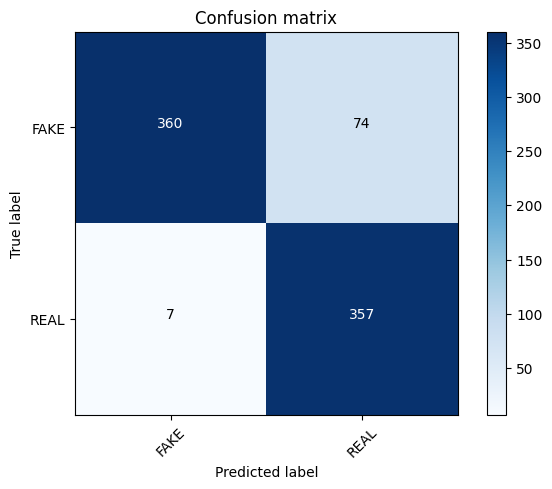

In [105]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [106]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8984962406015038

In [107]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.989
Confusion matrix, without normalization


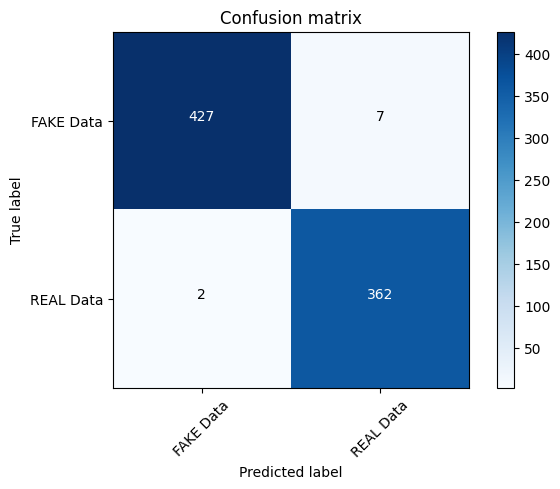

In [108]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])